In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import time

In [2]:
# Load test results data
dfs = []
dfs.append(pd.read_csv('./results/brand1.csv'))
print("Brand 1:", dfs[0].shape)
dfs.append(pd.read_csv('./results/brand2.csv'))
print("Brand 2:", dfs[1].shape)
dfs.append(pd.read_csv('./results/brand3.csv'))
print("Brand 3:", dfs[2].shape)

Brand 1: (12204519, 2)
Brand 2: (4972672, 2)
Brand 3: (757709, 2)


In [3]:
# get ROC curve and AUC score for each brand
roc_curves = []
auc_scores = []
for i in range(3):
    y_true = dfs[i]['y_test']
    y_pred = dfs[i]['y_pred_test']
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_curves.append((fpr, tpr))
    auc_scores.append(roc_auc_score(y_true, y_pred))

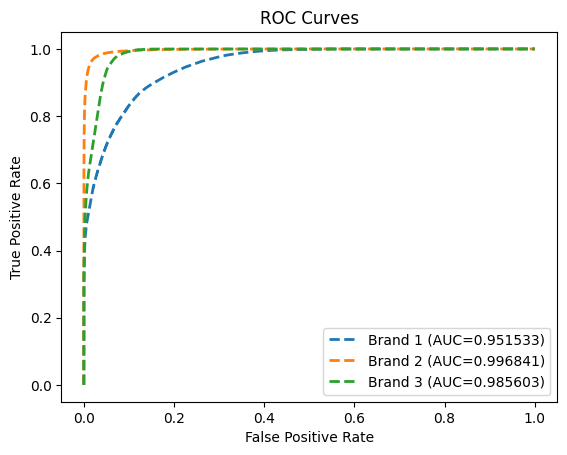

In [4]:
# plot ROC curves
for i in range(3):
    fpr, tpr = roc_curves[i]
    plt.plot(fpr, tpr, label='Brand {} (AUC={:.6f})'.format(i+1, auc_scores[i]), linewidth=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

# save plot
plt.savefig('./results/' + time.strftime("%m-%d_%H-%M-%S") + '_roc.png')

# show plot
plt.show()